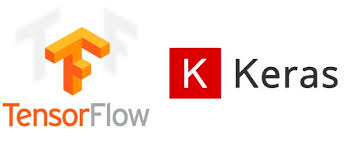


<div style="direction:rtl">

# Loss Functions:
    
در این بخش ما توابع هزینه ی متفاوتی را برای مسایل رگرسیون و طبقه بندی را مورد تست و ارزیابی قرار می دهیم

</div>

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()
sess = tf.Session()

<div style="direction:rtl">

## Numerical Predictions:
    
برای این که بتوانیم تفاوت توابع هزینه را نشان دهیم ما یک دیتا و یک مقدار را به عنوان هدف پیش بینی تعریف می کنیم. ما مقدار هدف را 0 در نظر می گیریم.

</div>


In [2]:
# Various Predicted X-values
x_vals = tf.linspace(-1., 1., 500)

# Create our target of zero
target = tf.constant(0.)

    
##  L2 Loss:Least Absolute Deviations


\begin{equation}
L_2 loss=\sum_{i=1}^{n} (y_{true}-y_{predicted})^2
\end{equation}




In [3]:
# L2 loss
# L = (pred - actual)^2
l2_y_vals = tf.square(target - x_vals)
l2_y_out = sess.run(l2_y_vals)


### L1 Loss:Least Square Errors


\begin{equation}
L_1 loss=\sum_{i=1}^{n} |y_{true}-y_{predicted}|
\end{equation}


In [4]:
# L1 loss
# L = abs(pred - actual)
l1_y_vals = tf.abs(target - x_vals)
l1_y_out = sess.run(l1_y_vals)

### Pseudo-Huber Loss
\begin{equation}
S=\sum_{i=1}^{n} \partial^2( \sqrt{\left(1+(\frac{y_i-f(x_i)}{\partial})\right) }-1)
\end{equation}

In [5]:
# L = delta^2 * (sqrt(1 + ((pred - actual)/delta)^2) - 1)
# Pseudo-Huber with delta = 0.25
delta1 = tf.constant(0.25)
phuber1_y_vals = tf.multiply(tf.square(delta1), tf.sqrt(1. + tf.square((target - x_vals)/delta1)) - 1.)
phuber1_y_out = sess.run(phuber1_y_vals)
# Pseudo-Huber with delta = 5
delta2 = tf.constant(5.)
phuber2_y_vals = tf.multiply(tf.square(delta2), tf.sqrt(1. + tf.square((target - x_vals)/delta2)) - 1.)
phuber2_y_out = sess.run(phuber2_y_vals)

### Plot the Regression Losses

- L1
- L2
- Pseudo-Huber


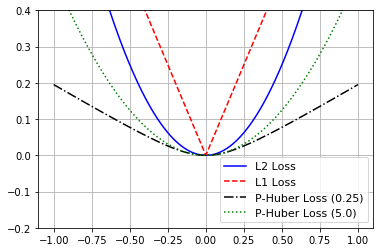

In [6]:
x_array = sess.run(x_vals)
plt.plot(x_array, l2_y_out, 'b-', label='L2 Loss')
plt.plot(x_array, l1_y_out, 'r--', label='L1 Loss')
plt.plot(x_array, phuber1_y_out, 'k-.', label='P-Huber Loss (0.25)')
plt.plot(x_array, phuber2_y_out, 'g:', label='P-Huber Loss (5.0)')
plt.ylim(-0.2, 0.4)
plt.legend(loc='lower right', prop={'size': 11})
plt.grid()
plt.show()



<div style="direction:rtl">

## Categorical Predictions:
در این بخش به توابع هزینه برای طبقه بندی می پردازیم در ابتدا یک مجموعه دیتا که دارای هدف  ۱ می باشد را تعریف می کنیم

</div>


In [7]:
# Various predicted X values
x_vals = tf.linspace(-3., 5., 500)

# Target of 1.0
target = tf.constant(1.)
targets = tf.fill([500,], 1.)

### Hinge Loss

`max(0, 1-(pred*actual))`.

In [8]:
# Hinge loss
# Use for predicting binary (-1, 1) classes
# L = max(0, 1 - (pred * actual))
hinge_y_vals = tf.maximum(0., 1. - tf.multiply(target, x_vals))
hinge_y_out = sess.run(hinge_y_vals)

### Cross Entropy Loss



$$Cross Entropy=-(y*\log(p)+(1-y)(\log(1-p))$$



In [9]:
# Cross entropy loss
# L = -actual * (log(pred)) - (1-actual)(log(1-pred))
xentropy_y_vals = - tf.multiply(target, tf.log(x_vals)) - tf.multiply((1. - target), tf.log(1. - x_vals))
xentropy_y_out = sess.run(xentropy_y_vals)

### Sigmoid Entropy Loss

$$Sigmoid Entropy=-(y*\log(sigmoid(p))+(1-y)(\log(1-sigmoid(p)))$$



In [10]:
# L = -actual * (log(sigmoid(pred))) - (1-actual)(log(1-sigmoid(pred)))
# or
# L = max(actual, 0) - actual * pred + log(1 + exp(-abs(actual)))
x_val_input = tf.expand_dims(x_vals, 1)
target_input = tf.expand_dims(targets, 1)
xentropy_sigmoid_y_vals = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_val_input, labels=target_input)
xentropy_sigmoid_y_out = sess.run(xentropy_sigmoid_y_vals)

### Weighted (Softmax) Cross Entropy Loss

$$Sigmoid Entropy=-y*(\log(p)* weights)-(1-y)(\log(1-p))$$


In [11]:
# Weighted (softmax) cross entropy loss
# L = -actual * (log(pred)) * weights - (1-actual)(log(1-pred))
# or
# L = (1 - pred) * actual + (1 + (weights - 1) * pred) * log(1 + exp(-actual))
weight = tf.constant(0.5)
xentropy_weighted_y_vals = tf.nn.weighted_cross_entropy_with_logits(logits=x_vals,
                                                                    targets=targets,
                                                                    pos_weight=weight)
xentropy_weighted_y_out = sess.run(xentropy_weighted_y_vals)

### Plot the Categorical Losses

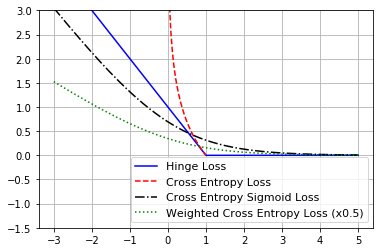

In [12]:
# Plot the output
x_array = sess.run(x_vals)
plt.plot(x_array, hinge_y_out, 'b-', label='Hinge Loss')
plt.plot(x_array, xentropy_y_out, 'r--', label='Cross Entropy Loss')
plt.plot(x_array, xentropy_sigmoid_y_out, 'k-.', label='Cross Entropy Sigmoid Loss')
plt.plot(x_array, xentropy_weighted_y_out, 'g:', label='Weighted Cross Entropy Loss (x0.5)')
plt.ylim(-1.5, 3)
plt.legend(loc='lower right', prop={'size': 11})
plt.grid()
plt.show()

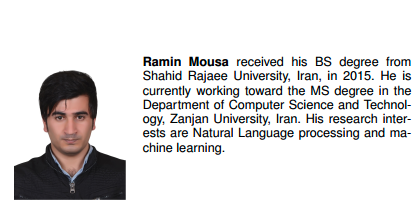